# Maquinas de soporte vectorial para clasificacion (SVC)

Este metodo puede considerar una extension del perceptron, con la diferenecia de que en el metodo del Perceptron buscabamos minimizar los errores de clasificacion, en cambio con el metodo de las maquinas de soporte vectorial, buscaremos maximizar un concepto conocido como **margen**.

El **margen** es la distancia entre el hiperplano de separacion (limite de decision) y las muestras de entrenamiento que estan mas cerca de ese hiperplano, las cuales se denominan **vectores de soporte**.

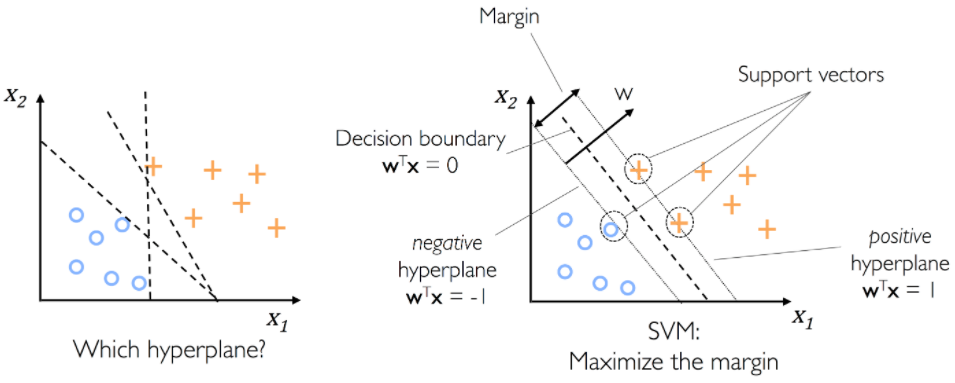

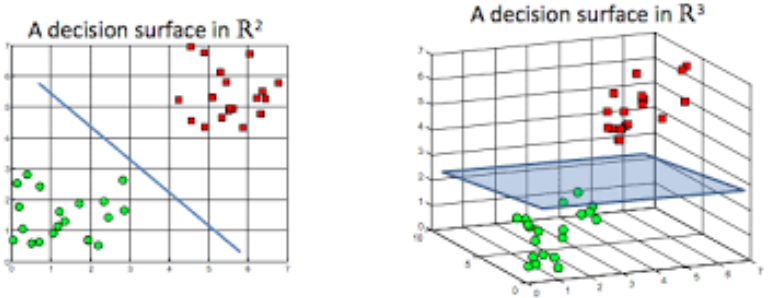

Dentro de la teoria matematica, la funcion que se desea minimizar, es la funcion:

$$\frac{1}{2}||\textbf{w}||^2+C\big(\sum_{i}\xi^{(i)}\big)$$


Siendo $\textbf{w}$ el vector de los pesos probabilisticas (coeficientes del modelo), C un hiperparametro relacionado con un concepto llamado **clasificacion de margen blando**. Este concepto se refiere a la seleccion flexible de limites de decision inclusive cuando los datos sean no separables linealmente. $\xi$ representa una variable flexible que permite elegir hiperplanos de clasificacion, aun cuando hayan errores presentes. Entre mayor sea C, mas estrictos seremos con la generacion de las fronteras de decision, lo cual no es siempre la mejor opcion:

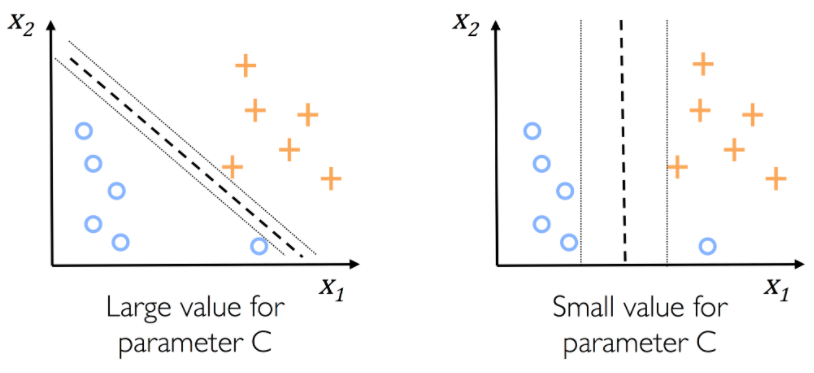

In [1]:
from sklearn import datasets
datos = datasets.load_iris()
X = datos.data[:, [2, 3]]
y = datos.target

# ==============================================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

# ==============================================
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C = 0.1, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=0.1, kernel='linear', random_state=1)

In [18]:
# Graficando las regiones
# =========================================================
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, X_test = None, y_test = None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if X_test:
        # plot all samples
        #X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

<IPython.core.display.Javascript object>


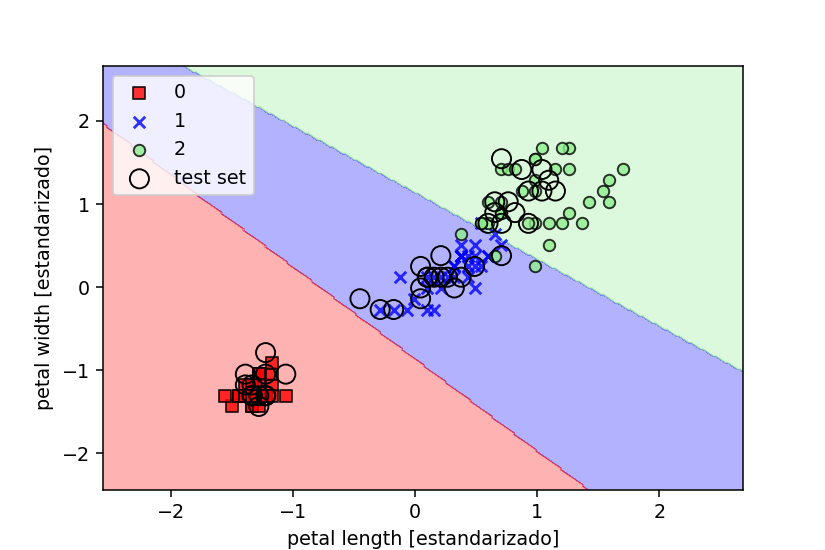

<ipython-input-5-3752d18c3a12>:39: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


In [15]:
%matplotlib notebook
fig, ax = plt.subplots(figsize = (6, 4))
plot_decision_regions(X_train_std, y_train, svm, X_test_std, y_test)
plt.xlabel('petal length [estandarizado]')
plt.ylabel('petal width [estandarizado]')
plt.legend(loc='upper left')

In [16]:
from sklearn.metrics import accuracy_score
print(f'Precision en el conjunto de entrenamiento: {accuracy_score(y_train, svm.predict(X_train_std))}')
print(f'Precision en el conjunto de prueba: {accuracy_score(y_test, svm.predict(X_test_std))}')

Precision en el conjunto de entrenamiento: 0.9523809523809523
Precision en el conjunto de prueba: 0.9777777777777777


## Resolver problemas no lineales con una SVM kernelizada

Las SVM son bastante populares por diversas razones, una de ellas es la posibilidad de **kernelizarlas** facilmente para resolver problemas no lineales, lo cual simplemente se refiere a transformar los datos de entrenamiento, a datos en un espacio de dimension superior por medio de una funcion de transformacion llamada **kernel**.

Para entenderlo un poco mejor, consideremos la siguiente imagen:

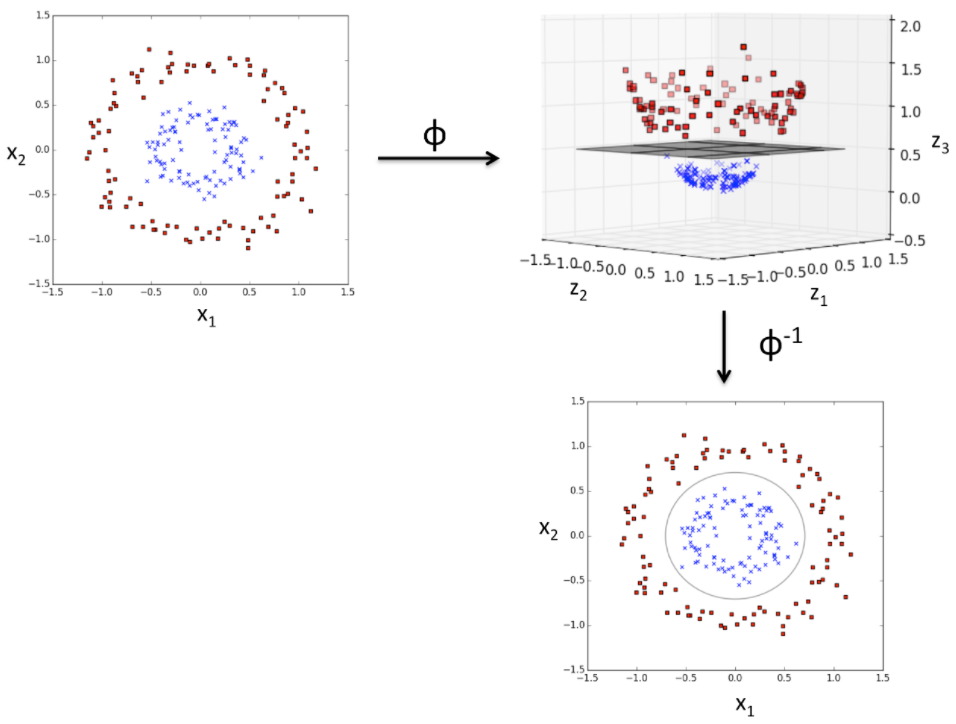

En la imagen se ve como el conjunto de datos inicial no es separable linealmente; se procede entonces a realizar una combinacion no lineal de las caracteristicas para proyectarlas a un espacio de dimension superior, por medio de una funcion de mapeo $\phi$, en donde si seran separables linealmente. Esto nos permite separar las dos clases que aparecen en la imagen mediante un hiperplano lineal, el cual se convierte en un limite de decision no lineal cuando lo llevamos de vuelta al espacio original.

En el ejenplo anterior, la funcion de mapeo fue:

$$\phi(x_1,x_2) = (z_1,z_2,z_3)=(x_1, x_2, x_1^2+x_2^2)$$

Lo cual define un paraboloide.

Es importante recordar que el proceso implica la transformacion de los datos de entrenamiento a un espacio de mayor dimensionalidad en el cual se entrenara un SVM lineal para clasificar alli los datos. Despues podemos utilizar la misma funcion de mapeo para transformar los datos no visto y clasificarlos por medio del modelo de SVM lineal.

El principal problema de este enfoque es el gran consumo de recursos que implica, especialmente para datos de mayor dimensionalidad. Aqui es donde el truco del kernel es de utilidad pues simplifica un poco el problema al replantear el problema de la minimizacion de la funcion de costo a traves de funciones kernel.

Una de las funciones kernel mas utilizada, es la conocida **Funcion de base radial (RBF)** , tambien conocida como **kernel Gaussiana**:

$$ K(\textbf{x}^{(i)},\textbf{x}^{(j)})=exp\bigg(-\gamma||\textbf{x}^{(i)}-\textbf{x}^{(j)}||^2\bigg)$$ 

En donde $\gamma$ es un hiperparametro que hay que ajustar para mejorar el modelo. 

A continuacion generaremos un conjunto de datos que no son separables linealmente para usarlos de ejemplo:

<IPython.core.display.Javascript object>


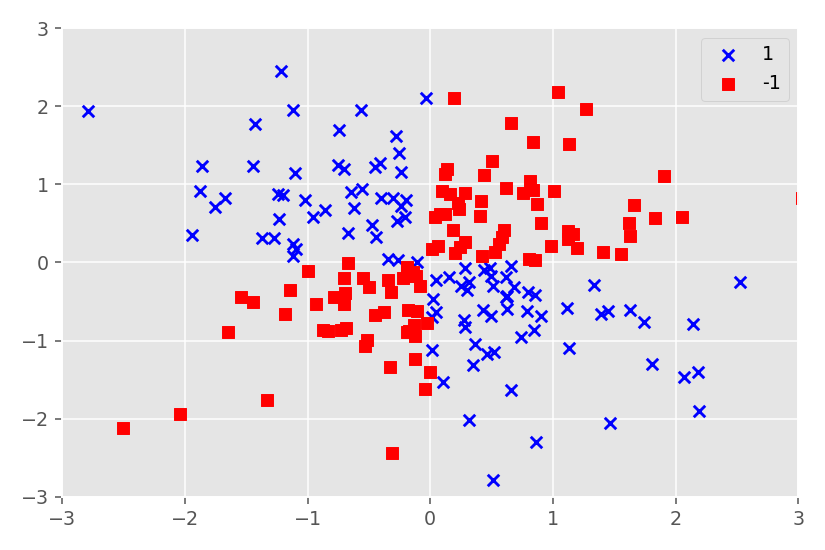

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

fig, ax = plt.subplots(figsize=(6,4))
plt.style.use('ggplot')
ax.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
ax.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [25]:
# intentando un ajuste con kernel lineal
from sklearn.svm import SVC
svm = SVC(C = 0.001, kernel = 'linear')
svm.fit(X_xor, y_xor)

SVC(C=0.001, kernel='linear')

<IPython.core.display.Javascript object>


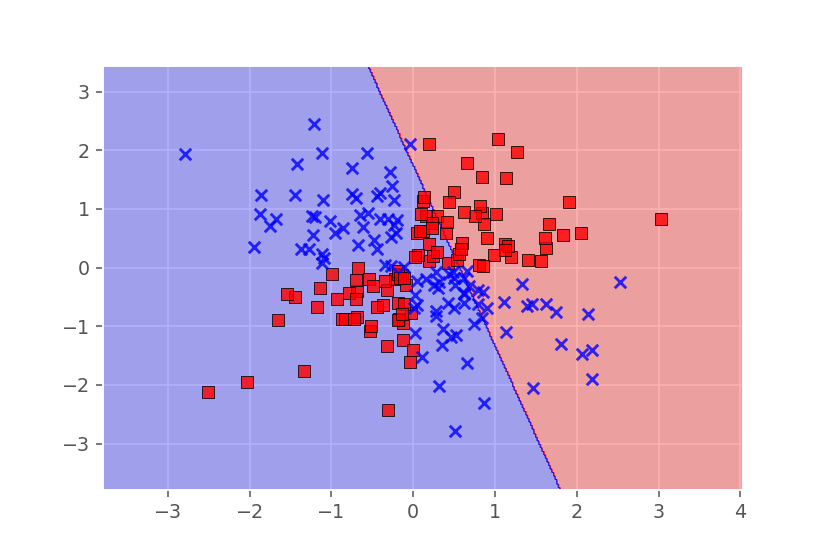

Precision: 0.585


In [26]:
from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(figsize = (6, 4))
plot_decision_regions(X_xor, y_xor, classifier = svm)
y_pred = svm.predict(X_xor)
print(f'Precision: {accuracy_score(y_xor, y_pred)}')

<IPython.core.display.Javascript object>


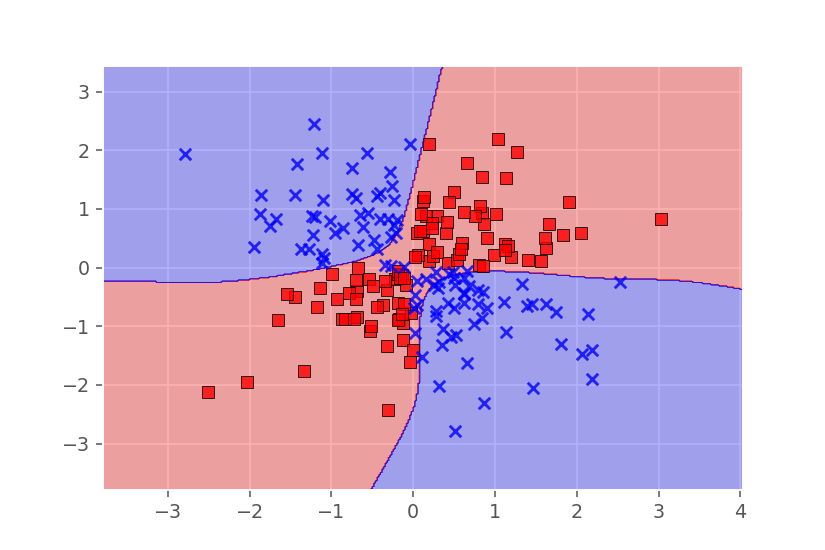

Precision: 0.935


In [27]:
# cambiandonos a un kernel gaussiano
svm = SVC(kernel = 'rbf', C= 1.0)
svm.fit(X_xor, y_xor)

fig, ax = plt.subplots(figsize = (6, 4))
plot_decision_regions(X_xor, y_xor, classifier = svm)
y_pred = svm.predict(X_xor)
print(f'Precision: {accuracy_score(y_xor, y_pred)}')

<IPython.core.display.Javascript object>


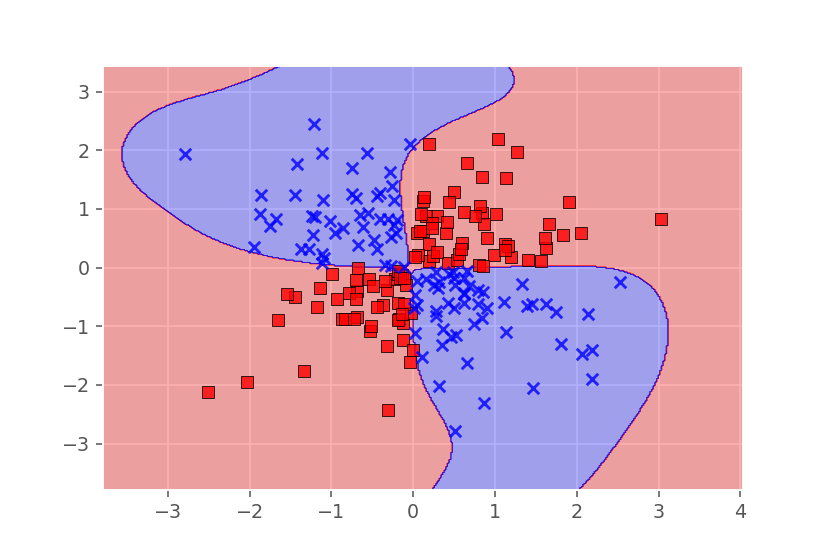

Precision: 1.0


In [31]:
# cambiandonos a un kernel gaussiano
svm = SVC(kernel = 'rbf', C=1000)
svm.fit(X_xor, y_xor)
fig, ax = plt.subplots(figsize = (6, 4))
plot_decision_regions(X_xor, y_xor, classifier = svm)
y_pred = svm.predict(X_xor)
print(f'Precision: {accuracy_score(y_xor, y_pred)}')

<IPython.core.display.Javascript object>


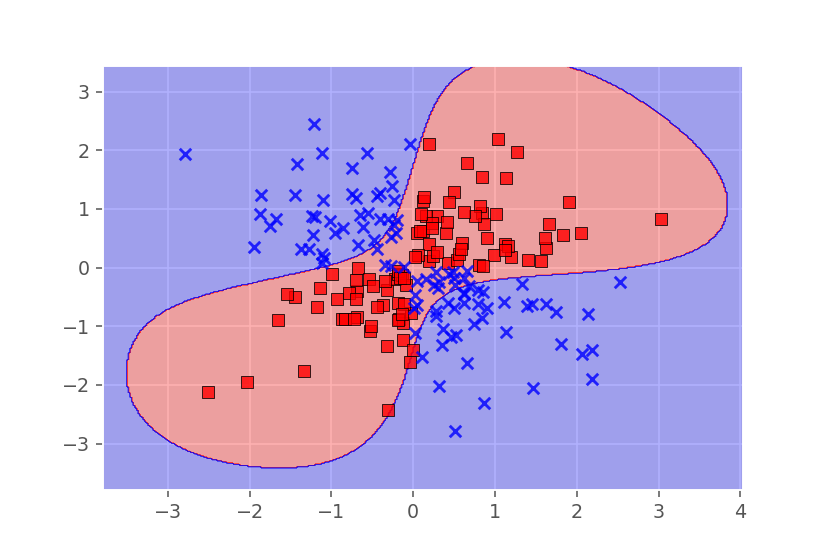

Precision: 0.875


In [29]:
# cambiandonos a un kernel gaussiano
svm = SVC(kernel = 'rbf', C=0.01)
svm.fit(X_xor, y_xor)
fig, ax = plt.subplots(figsize = (6, 4))
plot_decision_regions(X_xor, y_xor, classifier = svm)
y_pred = svm.predict(X_xor)
print(f'Precision: {accuracy_score(y_xor, y_pred)}')

El parametro gamma puede ser entendido como un parametro de corte para la esfera gaussiana; entre mayor sea gamma, mas apretada es la decicion respecto a los valores de entrenamiento, lo cual podria llevar a un overfitting. Entre mas pequeño sea gamma, mas suave sera el ajuste a los datos de entrenamiento.

<IPython.core.display.Javascript object>


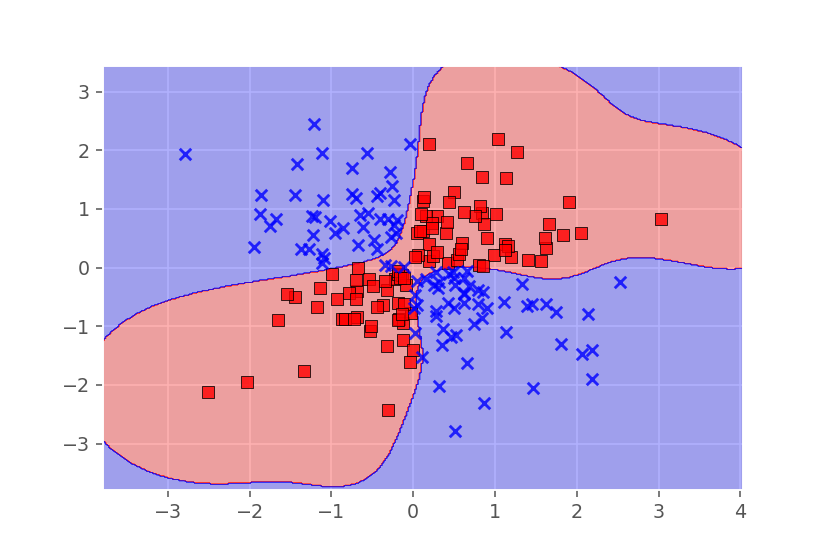

Precision: 0.96


In [32]:
# cambiandonos a un kernel gaussiano
svm = SVC(kernel = 'rbf', C=1.0, gamma = 1.0)
svm.fit(X_xor, y_xor)
fig, ax = plt.subplots(figsize = (6, 4))
plot_decision_regions(X_xor, y_xor, classifier = svm)
y_pred = svm.predict(X_xor)
print(f'Precision: {accuracy_score(y_xor, y_pred)}')

<IPython.core.display.Javascript object>


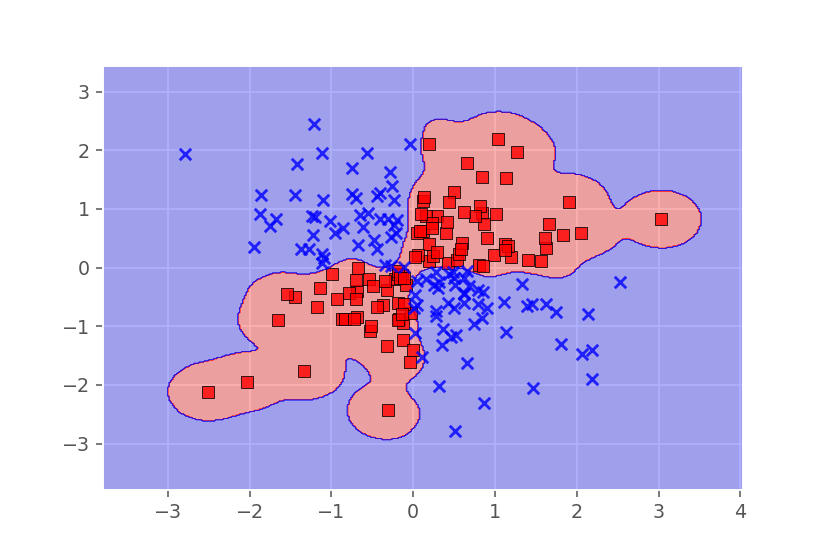

Precision: 0.98


In [33]:
# cambiandonos a un kernel gaussiano
svm = SVC(kernel = 'rbf', C=1.0, gamma = 10)
svm.fit(X_xor, y_xor)
fig, ax = plt.subplots(figsize = (6, 4))
plot_decision_regions(X_xor, y_xor, classifier = svm)
y_pred = svm.predict(X_xor)
print(f'Precision: {accuracy_score(y_xor, y_pred)}')

<IPython.core.display.Javascript object>


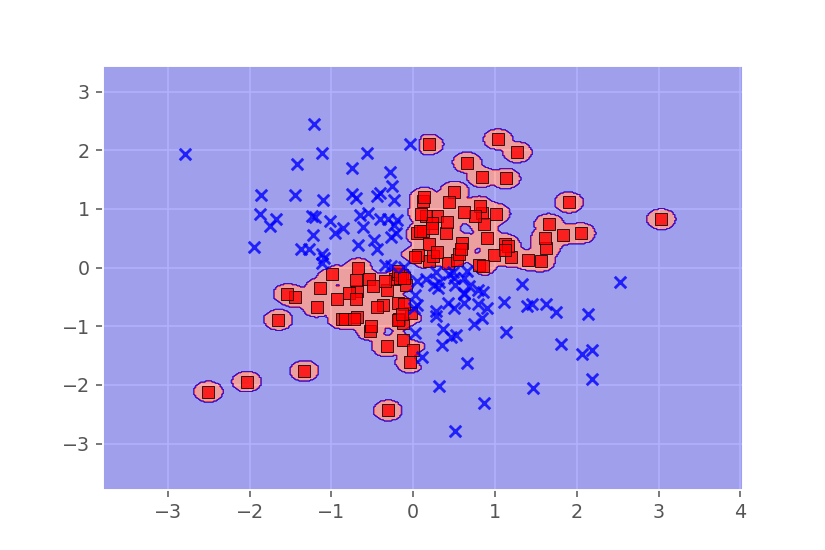

Precision: 1.0


In [37]:
# cambiandonos a un kernel gaussiano
svm = SVC(kernel = 'rbf', C=1.0, gamma = 100)
svm.fit(X_xor, y_xor)
fig, ax = plt.subplots(figsize = (6, 4))
plot_decision_regions(X_xor, y_xor, classifier = svm)
y_pred = svm.predict(X_xor)
print(f'Precision: {accuracy_score(y_xor, y_pred)}')

<IPython.core.display.Javascript object>


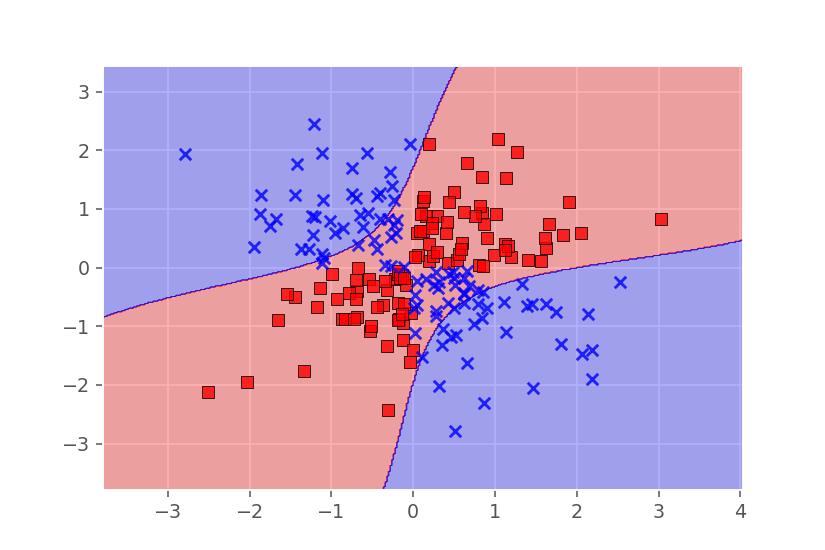

Precision: 0.815


In [35]:
# cambiandonos a un kernel gaussiano
svm = SVC(kernel = 'rbf', C=1.0, gamma = 0.1)
svm.fit(X_xor, y_xor)
fig, ax = plt.subplots(figsize = (6, 4))
plot_decision_regions(X_xor, y_xor, classifier = svm)
y_pred = svm.predict(X_xor)
print(f'Precision: {accuracy_score(y_xor, y_pred)}')

<div class="burk">
EJERCICIOS</div><i class="fa fa-lightbulb-o "></i>

Tratar de hacer estos ejericicios sin consultar el material previo, a menos que pertenezca a esta clase.

1. Importe el conjunto de datos iris y despliegue los conjuntos data, target y target_names.
2. Elija las dos caracteristicas que desee del conjunto, por ejemplo `petal_width` y `petal_length`; divida al conjunto de datos en entrenamiento y test, tomando un tamaño del conjunto de test del 20%. Ademas cree variables escaladas usando la estandarizacion vista en clases anteriores.
3. Cree un modelo de clasificacion SVC con kernel lineal; evalue la precision en el conjunto de entrenamiento y luego en el conjunto de test; procure que no haya overfitting, y que la precision en el conjunto de test supere el 90%. Sera esto posible? Grafique usando la funcion `plot_decision_regions`; fijese bien en los argumentos que solicita dicha funcion.
4. Solo por probar su dominio del modelo, cree un nuevo modelo de clasificacion SVC con kernel lineal en donde se genere overfitting; recuerde que el hiperparametro gamma no es valido para un kernel lineal.  Grafique usando la funcion plot_decision_regions; fijese bien en los argumentos que solicita dicha funcion. Si el overfitting no es posible, entonces indiquelo como solucion del problema.
5. Ahora probaremos la kernelizacion de las maquinas de soporte vectorial; cree un modelo SVC con un valor de gamma de 1.0 y manteniendo C constante como 1.0. Evalue el rendimiento del conjunto de entrenamiento y del conjunto de test y evalue si se presento underfitting, overfitting o ninguna. Grafique.
6. Como no estamos seguros de cuales seran los mejores valores de C y gamma, cree un programa que nos ayuda a estimar cuales seran los mejores valores para esto. El programa debe filtrar de tal forma que no se presente overfiting, logrando encontrar los hiperparametros que presenten el mayor rendimiento en el conjutno de test. Una vez encontrados, grafique el modelo ya ajustado a los datos.